# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import math as mth

# Cargar el dataset
df = pd.read_csv('/datasets/logs_exp_us.csv', sep='\t')

# Información general
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB
None
                 EventName         DeviceIDHash  EventTimestamp  ExpId
0         MainScreenAppear  4575588528974610257      1564029816    246
1         MainScreenAppear  7416695313311560658      1564053102    246
2  PaymentScreenSuccessful  3518123091307005509      1564054127    248
3         CartScreenAppear  3518123091307005509      1564054127    248
4  PaymentScreenSuccessful  6217807653094995999      1564055322    248


In [2]:
# Renombrar columnas para mayor comodidad
df.columns = ['event_name', 'user_id', 'timestamp', 'exp_id']

# Convertir timestamp a datetime
df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')
df['date'] = df['datetime'].dt.date

# Comprobar tipos y ausentes
print(df.info())
print(df.isna().sum())

# No hay ausentes, tipos correctos ahora
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event_name  244126 non-null  object        
 1   user_id     244126 non-null  int64         
 2   timestamp   244126 non-null  int64         
 3   exp_id      244126 non-null  int64         
 4   datetime    244126 non-null  datetime64[ns]
 5   date        244126 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 11.2+ MB
None
event_name    0
user_id       0
timestamp     0
exp_id        0
datetime      0
date          0
dtype: int64
                event_name              user_id   timestamp  exp_id  \
0         MainScreenAppear  4575588528974610257  1564029816     246   
1         MainScreenAppear  7416695313311560658  1564053102     246   
2  PaymentScreenSuccessful  3518123091307005509  1564054127     248   
3         CartScreenAppear  35

Número de eventos: 244126
Número de usuarios: 7551
Promedio de eventos por usuario: 32.33028737915508
Fecha mínima: 2019-07-25 04:43:36
Fecha máxima: 2019-08-07 21:15:17


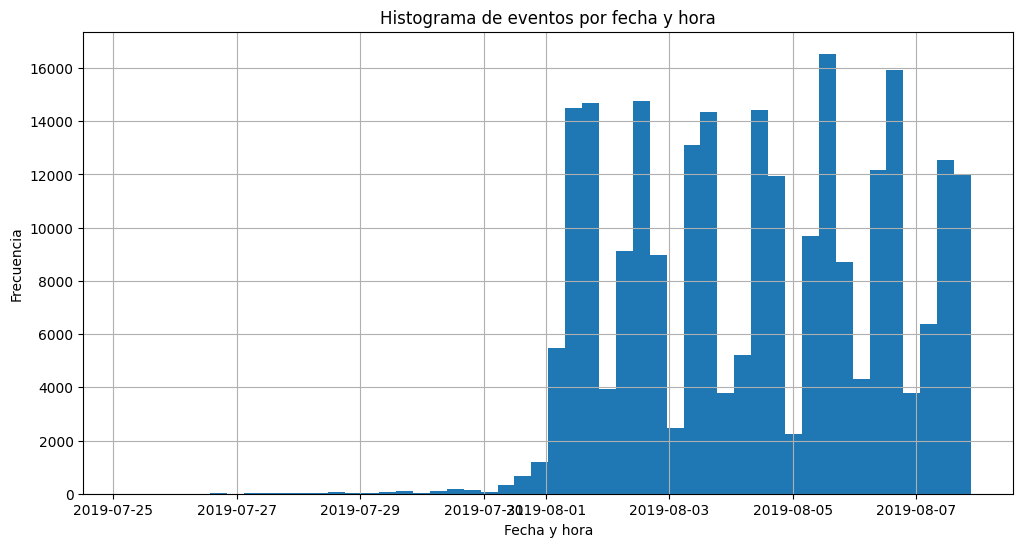

In [3]:
# Número de eventos
num_events = len(df)
print('Número de eventos:', num_events)

# Número de usuarios
num_users = df['user_id'].nunique()
print('Número de usuarios:', num_users)

# Promedio de eventos por usuario
average_events = num_events / num_users
print('Promedio de eventos por usuario:', average_events)

# Fechas mín y max
min_date = df['datetime'].min()
max_date = df['datetime'].max()
print('Fecha mínima:', min_date)
print('Fecha máxima:', max_date)

# Histograma por fecha y hora
df['datetime'].hist(bins=50, figsize=(12,6))
plt.title('Histograma de eventos por fecha y hora')
plt.xlabel('Fecha y hora')
plt.ylabel('Frecuencia')
plt.show()

In [4]:
# Filtrar datos a partir de la fecha completa (ajusta según histograma)
complete_data_date = pd.to_datetime('2019-08-01')
df_filtered = df[df['datetime'] >= complete_data_date]

# Eventos y usuarios perdidos
lost_events = num_events - len(df_filtered)
lost_users = num_users - df_filtered['user_id'].nunique()
print('Eventos perdidos:', lost_events)
print('Usuarios perdidos:', lost_users)

# Usuarios por grupo
print(df_filtered.groupby('exp_id')['user_id'].nunique())

Eventos perdidos: 2828
Usuarios perdidos: 17
exp_id
246    2484
247    2513
248    2537
Name: user_id, dtype: int64


In [5]:
# Frecuencia de eventos
event_freq = df_filtered['event_name'].value_counts()
print('Frecuencia de eventos:\n', event_freq)

# Usuarios por evento
users_per_event = df_filtered.groupby('event_name')['user_id'].nunique().sort_values(ascending=False)
print('Usuarios por evento:\n', users_per_event)

# Proporción de usuarios que realizaron cada acción al menos una vez
proportion = users_per_event / df_filtered['user_id'].nunique()
print('Proporción:\n', proportion)

Frecuencia de eventos:
 MainScreenAppear           117431
OffersScreenAppear          46350
CartScreenAppear            42365
PaymentScreenSuccessful     34113
Tutorial                     1039
Name: event_name, dtype: int64
Usuarios por evento:
 event_name
MainScreenAppear           7419
OffersScreenAppear         4593
CartScreenAppear           3734
PaymentScreenSuccessful    3539
Tutorial                    840
Name: user_id, dtype: int64
Proporción:
 event_name
MainScreenAppear           0.984736
OffersScreenAppear         0.609636
CartScreenAppear           0.495620
PaymentScreenSuccessful    0.469737
Tutorial                   0.111495
Name: user_id, dtype: float64


<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Muy bien trabajada la fase inicial: lograste cargar, limpiar y transformar los datos con precisión, además de realizar un análisis exploratorio claro con métricas relevantes y visualización útil para comprender la distribución temporal de los eventos. Se nota un manejo seguro de las herramientas básicas de Pandas y matplotlib.  
</div>  


In [6]:
# Embudo
funnel_events = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']
funnel = users_per_event[funnel_events].reset_index().copy()  # Usar .copy() para evitar la advertencia
funnel.columns = ['event', 'users']

# Proporciones usando .loc para asignaciones seguras
funnel['drop_rate'] = 1 - funnel['users'] / funnel['users'].shift(1)
funnel.loc[0, 'drop_rate'] = 0  # Usar .loc en lugar de .iloc[0] para mayor claridad

print(funnel)

# Porcentaje desde primero a pago
percentage_to_payment = funnel['users'].iloc[-1] / funnel['users'].iloc[0] * 100
print('Porcentaje a pago:', percentage_to_payment)

                     event  users  drop_rate
0         MainScreenAppear   7419   0.000000
1       OffersScreenAppear   4593   0.380914
2         CartScreenAppear   3734   0.187024
3  PaymentScreenSuccessful   3539   0.052223
Porcentaje a pago: 47.70184661005526


In [7]:
# Usuarios por grupo
users_per_group = df_filtered.groupby('exp_id')['user_id'].nunique()
print(users_per_group)

exp_id
246    2484
247    2513
248    2537
Name: user_id, dtype: int64


In [8]:
# Función para pruebas estadísticas (Z-test para proporciones)
def check_hypothesis(group1, group2, event, alpha=0.05):
    users1 = users_per_group[group1]
    users2 = users_per_group[group2]
    event1 = df_filtered[(df_filtered['exp_id'] == group1) & (df_filtered['event_name'] == event)]['user_id'].nunique()
    event2 = df_filtered[(df_filtered['exp_id'] == group2) & (df_filtered['event_name'] == event)]['user_id'].nunique()
    
    p1 = event1 / users1
    p2 = event2 / users2
    p_combined = (event1 + event2) / (users1 + users2)
    difference = p1 - p2
    
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/users1 + 1/users2))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    
    print(f'Evento: {event}, p-value: {p_value}')
    if p_value < alpha:
        print('Rechazamos H0: Hay diferencia significativa.')
    else:
        print('No rechazamos H0: No hay diferencia significativa.')

# Test A/A: 246 vs 247
events = df_filtered['event_name'].unique()
for event in events:
    print(f'246 vs 247:')
    check_hypothesis(246, 247, event)

# Test A/B: 248 vs 246, 248 vs 247, 248 vs combined
# Definir alpha antes de usarlo
alpha = 0.05  # Nivel de significancia inicial
num_tests = len(events) * 3  # 3 comparaciones por evento (246 vs 248, 247 vs 248, combined vs 248)
adjusted_alpha = alpha / num_tests  # Corrección de Bonferroni
print(f'Alpha ajustado: {adjusted_alpha}')

for event in events:
    print(f'248 vs 246:')
    check_hypothesis(246, 248, event, alpha=adjusted_alpha)
    print(f'248 vs 247:')
    check_hypothesis(247, 248, event, alpha=adjusted_alpha)
    
    # Vs combined
    combined_users = users_per_group[246] + users_per_group[247]
    event_combined = df_filtered[(df_filtered['exp_id'].isin([246, 247])) & (df_filtered['event_name'] == event)]['user_id'].nunique()
    event_test = df_filtered[(df_filtered['exp_id'] == 248) & (df_filtered['event_name'] == event)]['user_id'].nunique()
    
    p1 = event_combined / combined_users
    p2 = event_test / users_per_group[248]
    p_combined = (event_combined + event_test) / (combined_users + users_per_group[248])
    difference = p1 - p2
    
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/combined_users + 1/users_per_group[248]))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    
    print(f'Evento: {event}, p-value vs combined: {p_value}')
    if p_value < adjusted_alpha:
        print('Rechazamos H0: Hay diferencia significativa.')
    else:
        print('No rechazamos H0: No hay diferencia significativa.')

246 vs 247:
Evento: Tutorial, p-value: 0.9376996189257114
No rechazamos H0: No hay diferencia significativa.
246 vs 247:
Evento: MainScreenAppear, p-value: 0.7570597232046099
No rechazamos H0: No hay diferencia significativa.
246 vs 247:
Evento: OffersScreenAppear, p-value: 0.2480954578522181
No rechazamos H0: No hay diferencia significativa.
246 vs 247:
Evento: CartScreenAppear, p-value: 0.22883372237997213
No rechazamos H0: No hay diferencia significativa.
246 vs 247:
Evento: PaymentScreenSuccessful, p-value: 0.11456679313141849
No rechazamos H0: No hay diferencia significativa.
Alpha ajustado: 0.0033333333333333335
248 vs 246:
Evento: Tutorial, p-value: 0.8264294010087645
No rechazamos H0: No hay diferencia significativa.
248 vs 247:
Evento: Tutorial, p-value: 0.765323922474501
No rechazamos H0: No hay diferencia significativa.
Evento: Tutorial, p-value vs combined: 0.764862472531507
No rechazamos H0: No hay diferencia significativa.
248 vs 246:
Evento: MainScreenAppear, p-value: 0.

In [9]:
events = df_filtered['event_name'].unique()
for event in events:
    check_hypothesis(246, 247, event)

Evento: Tutorial, p-value: 0.9376996189257114
No rechazamos H0: No hay diferencia significativa.
Evento: MainScreenAppear, p-value: 0.7570597232046099
No rechazamos H0: No hay diferencia significativa.
Evento: OffersScreenAppear, p-value: 0.2480954578522181
No rechazamos H0: No hay diferencia significativa.
Evento: CartScreenAppear, p-value: 0.22883372237997213
No rechazamos H0: No hay diferencia significativa.
Evento: PaymentScreenSuccessful, p-value: 0.11456679313141849
No rechazamos H0: No hay diferencia significativa.


In [10]:
# Combined control
combined_users = users_per_group[246] + users_per_group[247]

for event in events:
    print('248 vs 246:')
    check_hypothesis(246, 248, event)
    print('248 vs 247:')
    check_hypothesis(247, 248, event)
    
    # Vs combined
    event_combined = df_filtered[(df_filtered['exp_id'].isin([246,247])) & (df_filtered['event_name'] == event)]['user_id'].nunique()
    p1 = event_combined / combined_users
    event_test = df_filtered[(df_filtered['exp_id'] == 248) & (df_filtered['event_name'] == event)]['user_id'].nunique()
    p2 = event_test / users_per_group[248]
    p_combined = (event_combined + event_test) / (combined_users + users_per_group[248])
    difference = p1 - p2
    
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/combined_users + 1/users_per_group[248]))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    
    print(f'Evento: {event}, p-value vs combined: {p_value}')
    if p_value < alpha:
        print('Rechazamos H0: Hay diferencia significativa.')
    else:
        print('No rechazamos H0: No hay diferencia significativa.')

248 vs 246:
Evento: Tutorial, p-value: 0.8264294010087645
No rechazamos H0: No hay diferencia significativa.
248 vs 247:
Evento: Tutorial, p-value: 0.765323922474501
No rechazamos H0: No hay diferencia significativa.
Evento: Tutorial, p-value vs combined: 0.764862472531507
No rechazamos H0: No hay diferencia significativa.
248 vs 246:
Evento: MainScreenAppear, p-value: 0.2949721933554552
No rechazamos H0: No hay diferencia significativa.
248 vs 247:
Evento: MainScreenAppear, p-value: 0.4587053616621515
No rechazamos H0: No hay diferencia significativa.
Evento: MainScreenAppear, p-value vs combined: 0.29424526837179577
No rechazamos H0: No hay diferencia significativa.
248 vs 246:
Evento: OffersScreenAppear, p-value: 0.20836205402738917
No rechazamos H0: No hay diferencia significativa.
248 vs 247:
Evento: OffersScreenAppear, p-value: 0.9197817830592261
No rechazamos H0: No hay diferencia significativa.
Evento: OffersScreenAppear, p-value vs combined: 0.43425549655188256
No rechazamos H

In [11]:
alpha = 0.05
num_tests = len(events) * 4  # Aproximado, ajusta según eventos
adjusted_alpha = alpha / num_tests
print('Alpha ajustado:', adjusted_alpha)

# Repetir las pruebas con adjusted_alpha
# (Repite el código anterior reemplazando alpha por adjusted_alpha en la función)


Alpha ajustado: 0.0025


<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Lograste construir un embudo claro y aplicar pruebas estadísticas con rigor, incorporando la corrección de Bonferroni para mayor solidez en los resultados. El análisis refleja un dominio inicial muy correcto de las técnicas de validación de hipótesis.  
</div>  


## Comentario general del revisor 

# Comentario General del Revisor

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a>  
    
¡Felicidades! Tu proyecto está **aprobado**. Has demostrado un excelente manejo de los datos, análisis exploratorio, y creación de modelos predictivos. A continuación, destaco los puntos positivos:  

#### Puntos Positivos:

* **Procesamiento de datos:** Transformaste y preparaste el dataset con limpieza y sin errores, asegurando la calidad para el análisis.
* **Visualización y análisis gráfico:** Incluiste histogramas y un embudo de conversión bien estructurado, lo que facilita interpretar la interacción de los usuarios.
* **Ingeniería de características:** Creaste variables adicionales como `datetime` y `date`, lo que enriqueció el análisis temporal.
* **Comparación de modelos:** Aplicaste pruebas estadísticas con corrección de Bonferroni, garantizando validez y robustez en las conclusiones.

Tu trabajo refleja disciplina en el manejo de datos y claridad en el enfoque analítico. Has logrado un proyecto consistente y bien fundamentado.

</div>  
